In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/heart_disease/heart.csv")

In [4]:
# dataset.keys()

In [5]:
# dataset.shape

In [6]:
import numpy as np

In [9]:
# dataset.describe()

In [10]:
# remove data with '?'

dataset = dataset[~dataset.isin(['?'])]

In [11]:
# remove data with nan value

dataset = dataset.dropna(axis=0)

In [12]:
# print(np.unique(dataset.Sex))
# print(np.unique(dataset.ChestPainType))
# print(np.unique(dataset.RestingECG))
# print(np.unique(dataset.ExerciseAngina))
# print(np.unique(dataset.ST_Slope))

In [13]:
dataset.Sex.replace(
    {
        'F' : 0,
        'M' : 1
    },
    inplace=True
)
dataset.ChestPainType.replace(
    {
      'ASY' : 0,
      'ATA' : 1,
      'NAP' : 2,
      'TA' : 3
    },
    inplace=True
)
dataset.RestingECG.replace(
    {
      'LVH' : 0,
      'Normal' : 1,
      'ST' : 2
    },
    inplace=True
)
dataset.ExerciseAngina.replace(
    {
        'N' : 0,
        'Y' : 1
    },
    inplace=True
)
dataset.ST_Slope.replace(
    {
        'Down' : 0,
        'Flat' : 1,
        'Up' : 2
    },
    inplace=True
)

In [16]:
from matplotlib import pyplot as plt

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

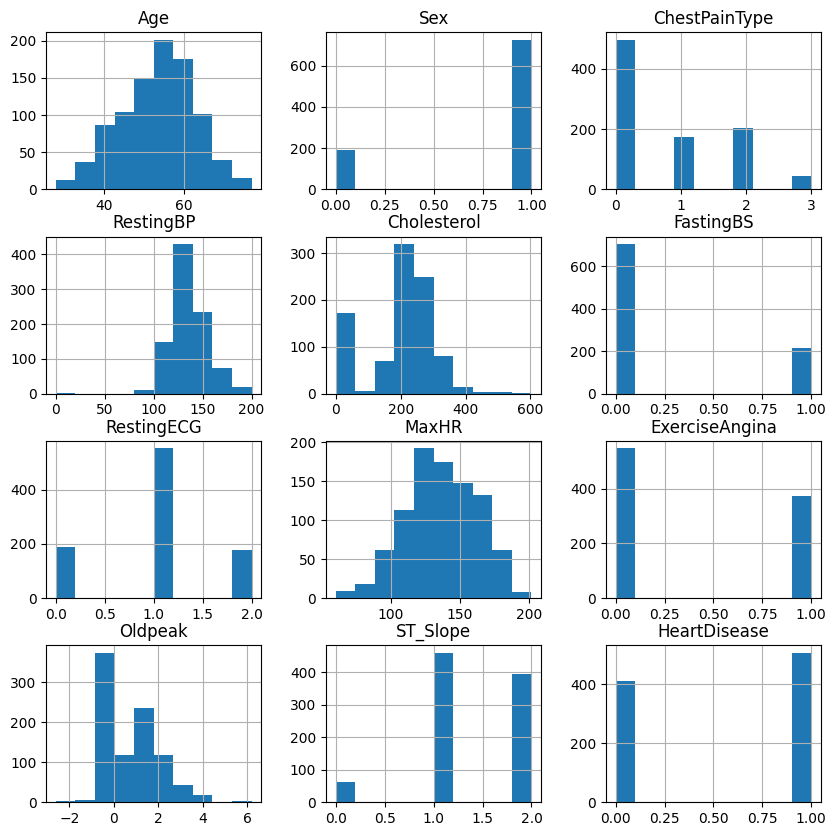

In [17]:
dataset.hist(figsize = (10, 10))
# plt.show()

Text(0, 0.5, 'Frequency')

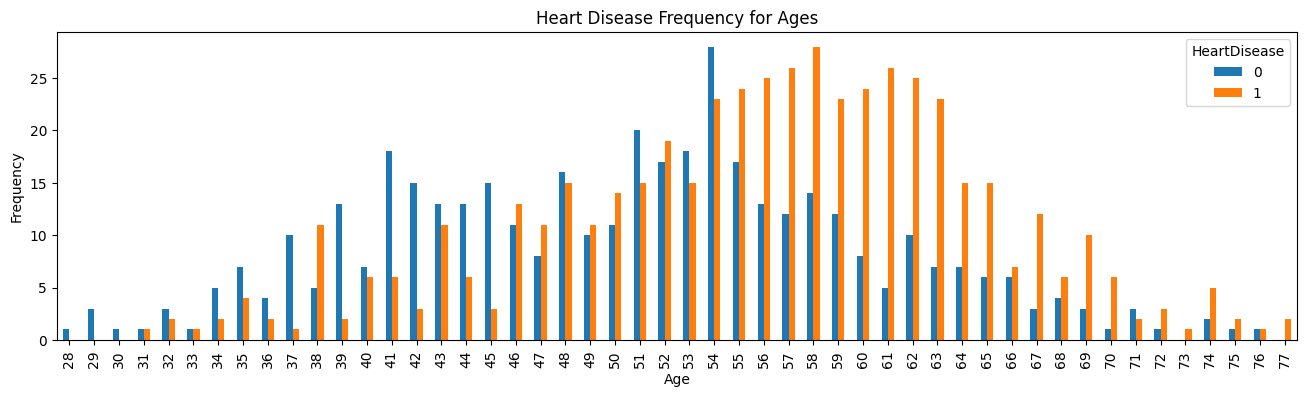

In [18]:
pd.crosstab(dataset.Age,dataset.HeartDisease).plot(kind="bar",figsize=(16,4))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.show()

In [19]:
x = np.array(dataset.drop(['HeartDisease'],1))
y = np.array(dataset['HeartDisease'])

<ipython-input-19-9e344318853c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(dataset.drop(['HeartDisease'],1))


In [20]:
# np.unique(y)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
# print(y_train.shape)
# print(y_test.shape)

**Model : Neural Network**

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [30]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=11, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(16,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(8,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2,activation='sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [31]:
model = create_model()
# model.summary()

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
batch_size = 20
epochs = 100

In [34]:
training = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data =(x_test,y_test))

Epoch 1/100
37/37 [==============================] - 1s 8ms/step - loss: 0.7846 - accuracy: 0.5204 - val_loss: 0.6868 - val_accuracy: 0.5489
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7387 - accuracy: 0.5436 - val_loss: 0.6845 - val_accuracy: 0.5435
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.5395 - val_loss: 0.6806 - val_accuracy: 0.5435
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5586 - val_loss: 0.6771 - val_accuracy: 0.5435
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.5722 - val_loss: 0.6756 - val_accuracy: 0.5435
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5599 - val_loss: 0.6701 - val_accuracy: 0.5435
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5668 - val_loss: 0.6610 - val_accuracy: 0.5978
Epoch 8/100
3

In [35]:
score = model.evaluate(x_test, y_test, verbose = 1)
# test loss and test accuracy
score

6/6 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8478


[0.33515918254852295, 0.8478260636329651]

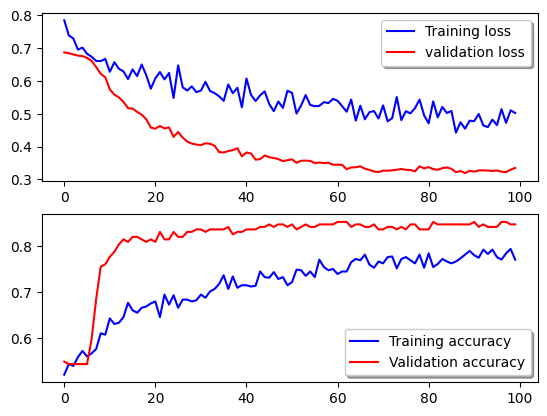

In [36]:
# model accuracy and loss
fig, ax = plt.subplots(2,1)
ax[0].plot(training.history['loss'], color='b', label="Training loss")
ax[0].plot(training.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(training.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(training.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [37]:
label = ['false','true']

In [41]:
result = model.predict([[40,10,250,0,255,0.0,1,0,0,1,0]])

1/1 [==============================] - 0s 44ms/step


In [42]:
# print(result)
# print(result[0][0])

In [43]:
ind = 0
if(result[0][0] < result[0][1]):
  ind = 1
label[ind]

'false'

In [46]:
import pickle

pickle.dump(model,open('model.pkl','wb'))